
<left>
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</left>

# *Data Science - PPGOLD*


---






# Aula 06 - Desenvolvimento do Modelo

Tempo estimado: **60** minutos

## Objetivos

Após completar este AULA, você será capaz de:

* Criar um modelo linear para a previsão
* Criar um modelo poinomial para a previsão
* Fazer a previsão dos seus dados


In [139]:
# import libraries
import pandas as pd  # Biblioteca para os DataFrames 
import numpy as np   # Biblioteca Numérica
import math 
import matplotlib.pyplot as plt
import seaborn as sns # import the visualization package: seaborn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Tabela para guardar os valores dos scores de cada modelo
table = pd.DataFrame(columns = ["Modelo", "Score"])

# Ler o arquivo online pela URL fornecida acima, e atribua-o à variável "df".
my_file = "https://raw.githubusercontent.com/EduPek/PPGOLD7037/main/Data/Auto_pronto.csv" #Cópia de segurança ;)

# Atribuir o arquivo a uma váriável DataFrame
df = pd.read_csv(my_file)

df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,twelve,two.1,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 75 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   wheel-base         201 non-null    float64
 3   length             201 non-null    float64
 4   width              201 non-null    float64
 5   height             201 non-null    float64
 6   curb-weight        201 non-null    int64  
 7   engine-size        201 non-null    int64  
 8   bore               201 non-null    float64
 9   stroke             201 non-null    float64
 10  compression-ratio  201 non-null    float64
 11  horsepower         201 non-null    float64
 12  peak-rpm           201 non-null    float64
 13  city-mpg           201 non-null    int64  
 14  highway-mpg        201 non-null    int64  
 15  price              201 non-null    float64
 16  fuel-type-diesel   201 non

<h4>Criar um objeto da Regressão Linear:</h4>


In [141]:
lm = LinearRegression()
lm

LinearRegression()

# Modelo 1 - Regressão Linear Simples

<h4>Como poderia " highway-mpg" nos ajudar a prever o preço do carro?</h4>

Para este exemplo, queremos ver como a highway-mpg pode nos ajudar a prever o preço do carro.

Usando a regressão linear simples, criaremos uma função linear com "highway-mpg" como a variável preditor e o " price" como a variável de resposta.


In [142]:
X = df[['highway-mpg']] # Aqui o SciKit Learn precisa da amostras e da dimensão, 
                        # por isso precisamos passar uma matriz ou dataFrame
Y = df['price']

print(X)
print(Y)

     highway-mpg
0             27
1             27
2             26
3             30
4             22
..           ...
196           28
197           25
198           23
199           27
200           25

[201 rows x 1 columns]
0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64


Aplica o modelo Linear usando somente highway-mpg como variável Independente


In [143]:
lm.fit(X,Y)

LinearRegression()

Calcular os valores previstos:


In [144]:
Yhat=lm.predict(X)

<h4>Qual o valor do intercepto (a)?</h4>


In [145]:
lm.intercept_

38423.3058581574

<h4>Qual o valor da inclinação da reta (b)?</h4>


In [146]:
lm.coef_

array([-821.73337832])

Qual o erro da precisão (R2)?

In [147]:
print("SCORE: ",lm.score(X, Y))

SCORE:  0.4965911884339176


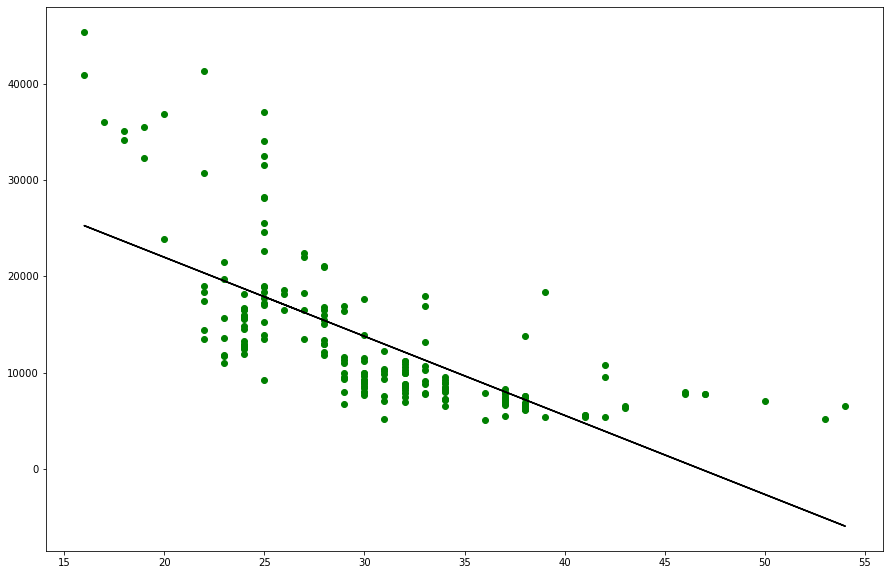

In [148]:
plt.figure(figsize=(15, 10))
plt.scatter(X, Y,color='g')
plt.plot(X, lm.predict(X),color='k')

plt.show()

# Gráfico Previsto x Real

Vamos usar o recurso gráfico para visualizar esse erro.

In [149]:
# Vamos colocar tudo num mesmo Data Frame para facilitar o Plot

df_graph = pd.DataFrame(np.array(df['price']))
df_graph.columns = ["Actual Value"]

df_graph["Fitted Value"]= Yhat
df_graph.head()

,Actual Value,Fitted Value
0,13495.0,16236.504643
1,16500.0,16236.504643
2,16500.0,17058.238022
3,13950.0,13771.304508
4,17450.0,20345.171535


In [150]:
df_graph.describe()

,Actual Value,Fitted Value
count,201.000000,201.000000
mean,13207.129353,13207.129353
std,7947.066342,5600.236181
min,5118.000000,-5950.296571
25%,7775.000000,10484.370995
50%,10295.000000,13771.304508
75%,16500.000000,17879.971400
max,45400.000000,25275.571805


In [151]:
df_graph.columns

Index(['Actual Value', 'Fitted Value'], dtype='object')

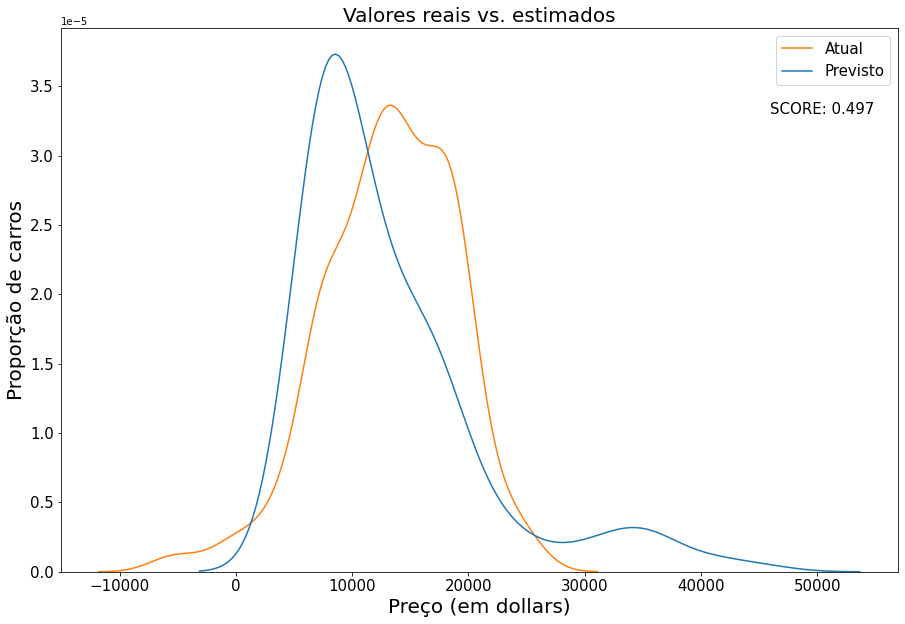

In [152]:
%matplotlib inline 
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_graph) # KDE - kernel density estimate

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %.3f" % lm.score(X, Y)

plt.text(45900, 0.000033, tt, size = 15)

plt.show()
plt.close()

# incluir linha na Tabela final para compararmos os diversos modelos
table.loc[table.shape[0]] = ["Modelo 1", lm.score(X, Y)]

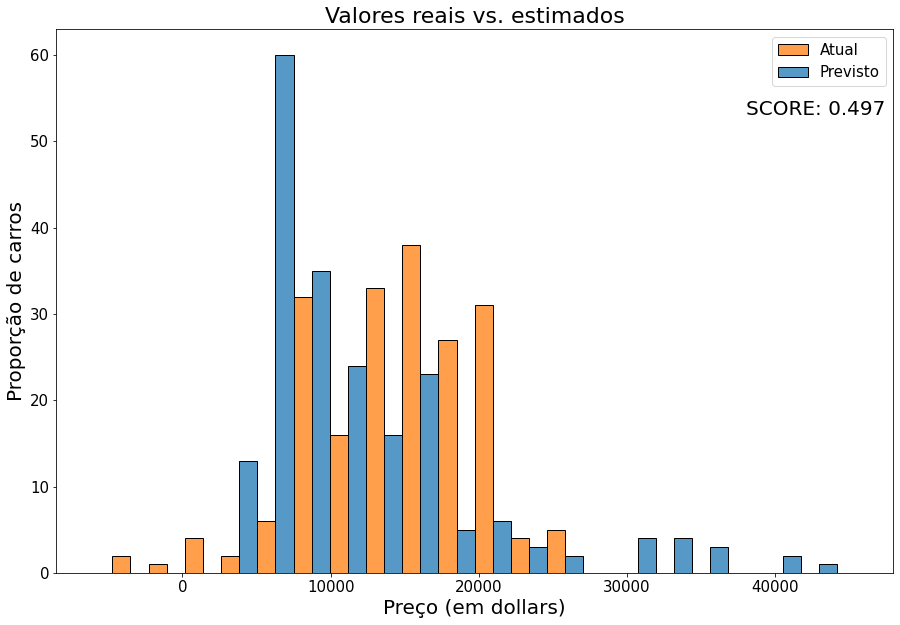

In [153]:
%matplotlib inline 
plt.figure(figsize=(15, 10))

sns.histplot(data = df_graph, multiple = 'dodge')

plt.title('Valores reais vs. estimados', size = 22)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %.3f" % lm.score(X, Y)

plt.text(38000, 53, tt, size = 20)

plt.show()
plt.close()

## Cálculo dos erros:

* Absoluto médio
* Raiz do erro quadrático médio

(array([-25000., -20000., -15000., -10000.,  -5000.,      0.,   5000.,
         10000.,  15000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

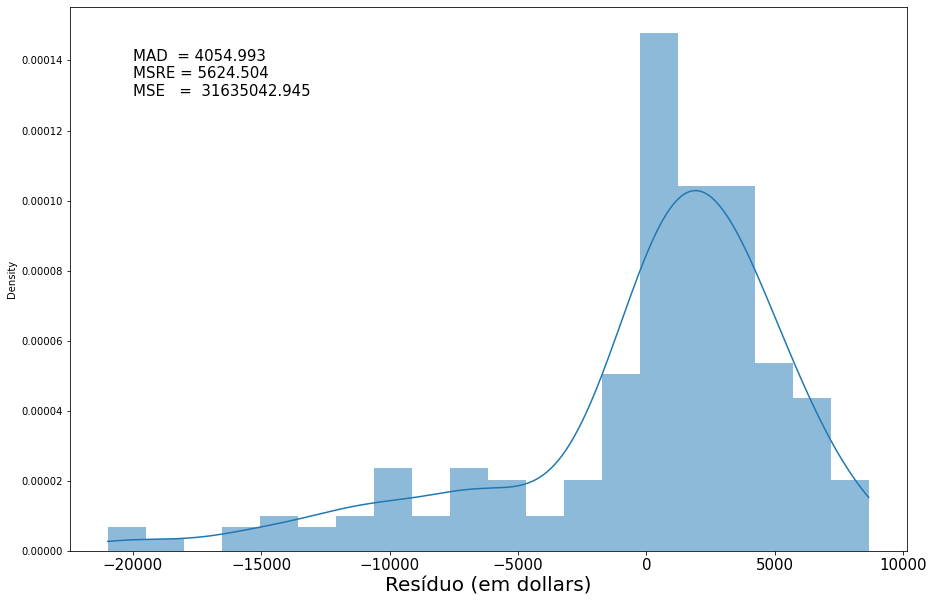

In [154]:
%matplotlib inline 
plt.figure(figsize=(15, 10))

res = Yhat - Y
resAbs = abs(res)
MAD = resAbs.mean()

MSRE = math.sqrt(mean_squared_error(Y,Yhat))

tt = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f" % (MAD, MSRE, mean_squared_error(Y,Yhat))

sns.histplot(x=res, kde=True, stat="density", linewidth=0)
plt.text(-20000, 0.00013, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)
plt.xticks(size = 15) 



# Modelo 2 - Regressão Linear Múltipla

<p>Da seção anterior sabemos que outros bons preditores de preço poderiam ser:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Vamos desenvolver um modelo utilizando estas variáveis como variáveis preditoras.

In [155]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm.fit(Z, df['price'])

print("SCORE: ",lm.score(Z, df['price']))


SCORE:  0.8094130135602673


Calcular os valores previstos:


In [156]:
Yhat2=lm.predict(Z)

## Gráfico Previsto x Real

Vamos usar o recurso gráfico para visualizar esse erro.

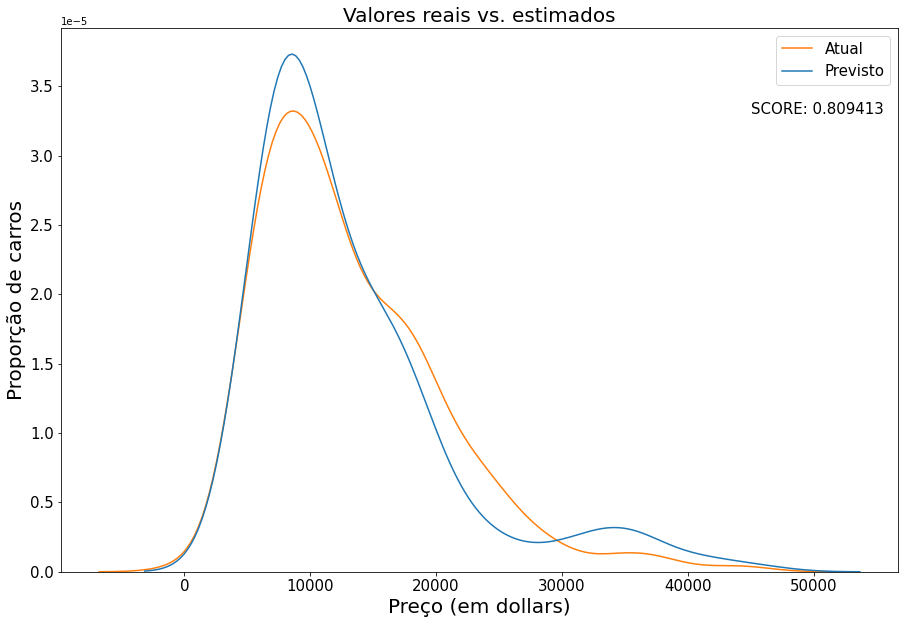

In [157]:
# Vamos colocar tudo num mesmo Data Frame para facilitar o Plot
df_graph = pd.DataFrame(np.array(df['price']))
df_graph.columns = ["Actual Value"]
df_graph["Fitted Value"]= Yhat2

df_graph.head()

%matplotlib inline 
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_graph)

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %f" % lm.score(Z, df['price'])

plt.text(45000, 0.000033, tt, size = 15)

plt.show()
plt.close()

# incluir linha na Tabela final para compararmos os diversos modelos
table.loc[table.shape[0]] = ["Modelo 2", lm.score(Z, df['price'])]

## Cálculo dos erros:

* Absoluto médio
* Raiz do erro quadrático médio

(array([-25000., -20000., -15000., -10000.,  -5000.,      0.,   5000.,
         10000.,  15000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

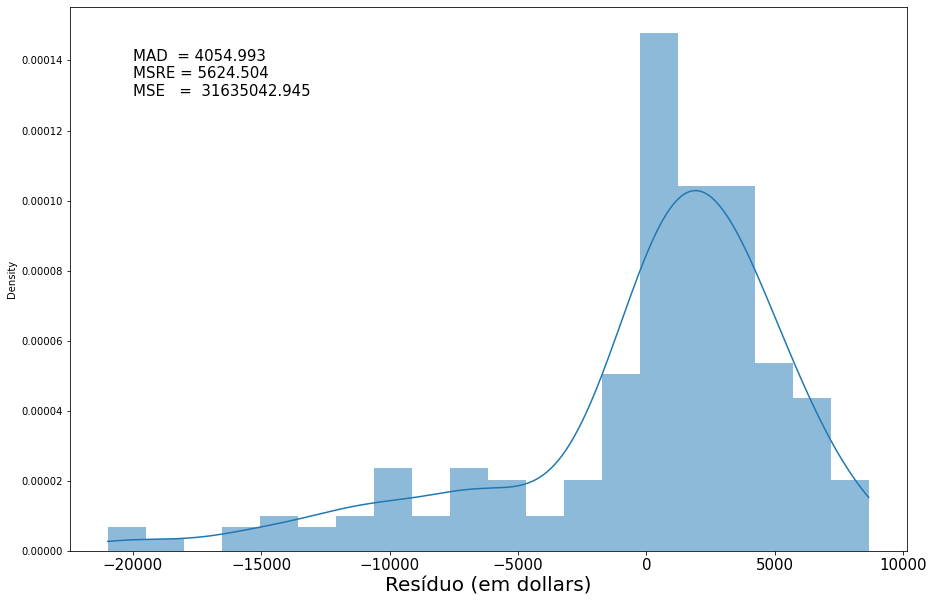

In [158]:
%matplotlib inline 
plt.figure(figsize=(15, 10))

res = Yhat - Y
resAbs = abs(res)
MAD = resAbs.mean()

MSRE = math.sqrt(mean_squared_error(Y,Yhat))

tt = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f" % (MAD, MSRE, mean_squared_error(Y,Yhat))

sns.histplot(x=res, kde=True, stat="density", linewidth=0)
plt.text(-20000, 0.00013, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)
plt.xticks(size = 15) 


# Modelo 3 - Regressão Linear Múltipla

* Todas as variáveis independentes

In [159]:
df_independent = df.drop('price', axis = 1)

lm.fit(df_independent, df['price'])
Yhat3=lm.predict(df_independent)

print("SCORE: ",lm.score(df_independent, df['price']))

SCORE:  0.9673423592670839


## Gráfico Previsto x Real

Vamos usar o recurso gráfico para visualizar esse erro.

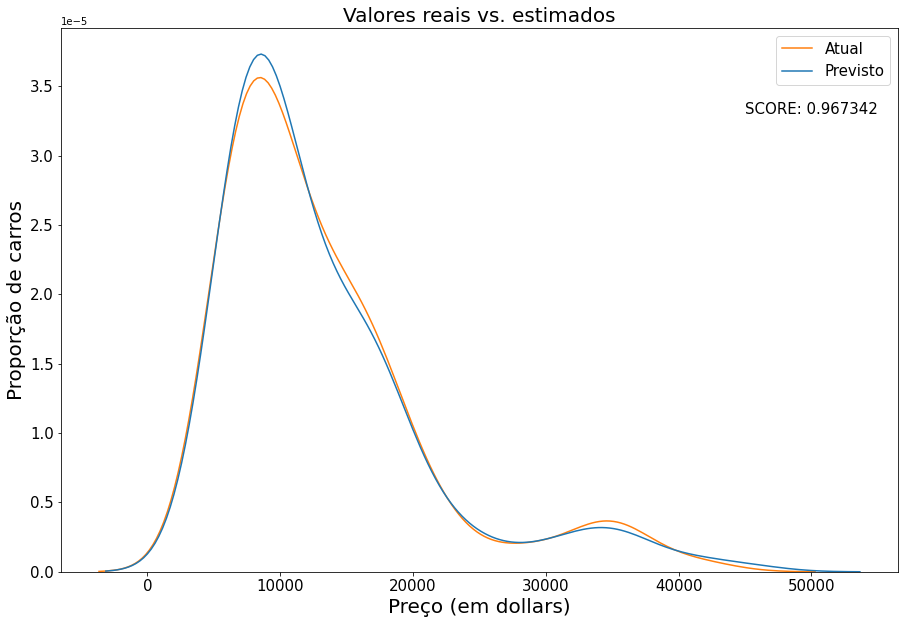

In [160]:
# Vamos colocar tudo num mesmo Data Frame para facilitar o Plot
df_graph = pd.DataFrame(np.array(df['price']))
df_graph.columns = ["Actual Value"]
df_graph["Fitted Value"]= Yhat3

df_graph.head()

%matplotlib inline 
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_graph)

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %f" % lm.score(df_independent, df['price'])

plt.text(45000, 0.000033, tt, size = 15)

plt.show()
plt.close()

# incluir linha na Tabela final para compararmos os diversos modelos
table.loc[table.shape[0]] = ["Modelo 3", lm.score(df_independent, df['price'])]                                                  

## Cálculo dos erros:

* Absoluto médio
* Raiz do erro quadrático médio

(array([-10000.,  -8000.,  -6000.,  -4000.,  -2000.,      0.,   2000.,
          4000.,   6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

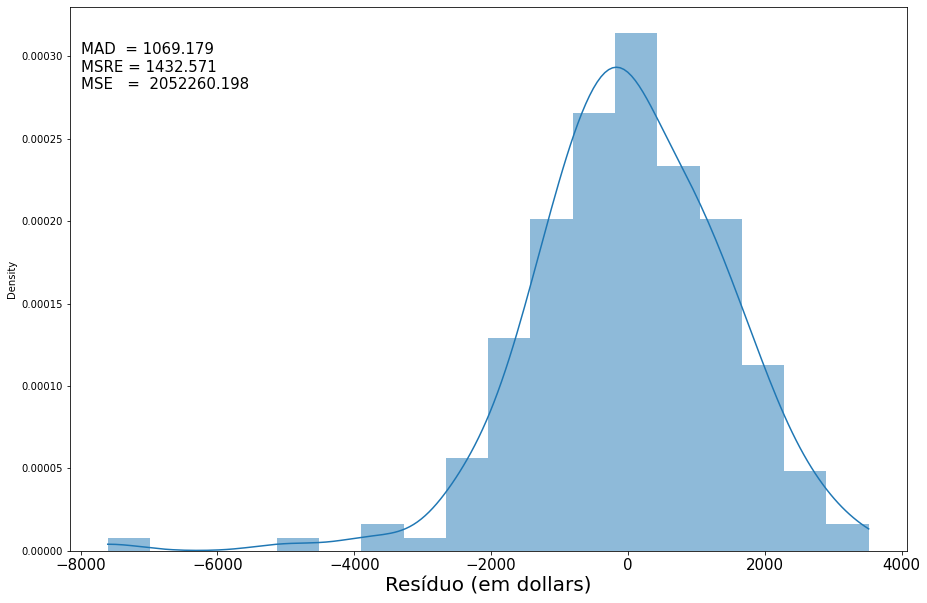

In [161]:
%matplotlib inline 
plt.figure(figsize=(15, 10))

res = Yhat3 - Y
resAbs = abs(res)

MAD = resAbs.mean()
MSRE = math.sqrt(mean_squared_error(Y,Yhat3))

tt = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f" % (MAD, MSRE, mean_squared_error(Y,Yhat3))

sns.histplot(x=res, kde=True, stat="density", linewidth=0)
plt.text(-8000, 0.00028, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)
plt.xticks(size = 15) 

## Qual modelo é o melhor ?

In [162]:
table

,Modelo,Score
0,Modelo 1,0.496591
1,Modelo 2,0.809413
2,Modelo 3,0.967342


## Então quanto eu devo pedir pelo FUSCÃO ?

In [163]:
# Características do FUSCAO

dados_fuscao = "https://raw.githubusercontent.com/EduPek/PPGOLD7037/main/Data/Auto_pronto_fuscao.csv"
df_fuscao = pd.read_csv(dados_fuscao)

YhatFuscao = lm.predict(df_fuscao)

str = "O Preço de venda estimado do FUSCÃO é de %.2f Dólares" % YhatFuscao[0]
print(str)


O Preço de venda estimado do FUSCÃO é de 2750.08 Dólares


## References:

Translated and inspired in the material developed by IBM:
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>
<br>


## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-08-06  | 0.90  | <a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pécora</a> |  Initial development |
| 2020-10-20  | 0.91  | <a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pécora</a> |  Updated Graphs |
| 2021-04-11  | 1.00  | <a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pécora</a> |  Updated Graphs, GitHub |

<hr>